In [1]:
## IMPORT YOUR LIBS HERE
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import pickle
# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries for helping us with text
import string
# Regular Expression Library
import re

import nltk 
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/kachu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kachu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kachu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('cleaned_monster.csv')

In [3]:
df.head()

,job_description,job_title,job_type,location,sector
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",IT/Software Development
1,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Experienced (Non-Manager)
2,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Project/Program Management
3,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Experienced (Non-Manager)
4,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",Experienced (Non-Manager)


In [4]:
df.shape

(16167, 5)

In [5]:
df.sector.value_counts()

Experienced (Non-Manager)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [6]:
threshold = 200

In [7]:
sector_counts = df['sector'].value_counts()

In [8]:
sectors_to_keep = sector_counts[sector_counts >= threshold].index.tolist()
sectors_to_keep.remove('Experienced (Non-Manager)')
sectors_to_keep.remove('Entry Level')
sectors_to_keep.remove('Manager (Manager/Supervisor of Staff)')

In [9]:
# Filter rows based on the selected sectors
filtered_df = df[df['sector'].isin(sectors_to_keep)]

In [10]:
filtered_df.head()

,job_description,job_title,job_type,location,sector
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",IT/Software Development
2,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Project/Program Management
5,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Customer Support/Client Care
6,Aflac Insurance Sales Agent While a career in ...,Aflac Insurance Sales Agent Job in Berryville,Full Time,"Berryville, VA 22611",Customer Support/Client Care
7,Enjoy making a great first impression? Our Sal...,Sales Associate Job in Columbus,Full Time Employee,"Columbus, IN",Customer Support/Client Care


In [11]:
filtered_df.sector.value_counts()

Medical/Health                         1231
IT/Software Development                 848
Sales/Retail/Business Development       845
Project/Program Management              783
Accounting/Finance/Insurance            735
Food Services/Hospitality               631
Installation/Maintenance/Repair         553
Manufacturing/Production/Operations     525
Customer Support/Client Care            320
Quality Assurance/Safety                312
Security/Protective Services            310
Marketing/Product                       302
Logistics/Transportation                293
Administrative/Clerical                 268
Legal                                   233
Name: sector, dtype: int64

In [12]:
def make_lower(a_string):
    return a_string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
make_lower(test_string)

'this is a sentence with lots of caps.'

In [13]:

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [14]:
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
test_string = 'I played and started playing with players and we all love to play with plays'

remove_stopwords(test_string)

'I played started playing players love play plays'

In [15]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string) 
    input_string = remove_stopwords(input_string)
    return input_string

test_string = 'I played and started playing with players and!!! we all.. love to play with plays'
text_pipeline(test_string)

'played started playing players love play plays'

In [16]:
filtered_df['job_description_clean'] = filtered_df['job_description'].apply(text_pipeline)

<ipython-input-16-28757ce0f5ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['job_description_clean'] = filtered_df['job_description'].apply(text_pipeline)


In [17]:
filtered_df.head()

,job_description,job_title,job_type,location,sector,job_description_clean
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",IT/Software Development,teamsoft seeing support specialist join client...
2,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Project/Program Management,position id 76162 positions 1 state ct city fa...
5,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Customer Support/Client Care,parttime 430 pm 930 pm mon fri brookdale westl...
6,Aflac Insurance Sales Agent While a career in ...,Aflac Insurance Sales Agent Job in Berryville,Full Time,"Berryville, VA 22611",Customer Support/Client Care,aflac insurance sales agent career sales may e...
7,Enjoy making a great first impression? Our Sal...,Sales Associate Job in Columbus,Full Time Employee,"Columbus, IN",Customer Support/Client Care,enjoy making great first impression sales asso...


In [18]:
X = filtered_df['job_description_clean']
y = filtered_df['sector']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42, stratify=y)
X_train_text = X_train
X_test_text = X_test

In [20]:
vectorizer = TfidfVectorizer()

In [21]:
vectorizer.fit(X_train)

TfidfVectorizer()

In [22]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
X_train.shape

(6551, 59955)

In [24]:
model = MultinomialNB(alpha = .00001)

In [25]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1e-05)

In [26]:
# save the model.
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

filename2 = 'finalized_vector.sav'
pickle.dump(vectorizer, open(filename2,'wb'))

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy =  model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.802198


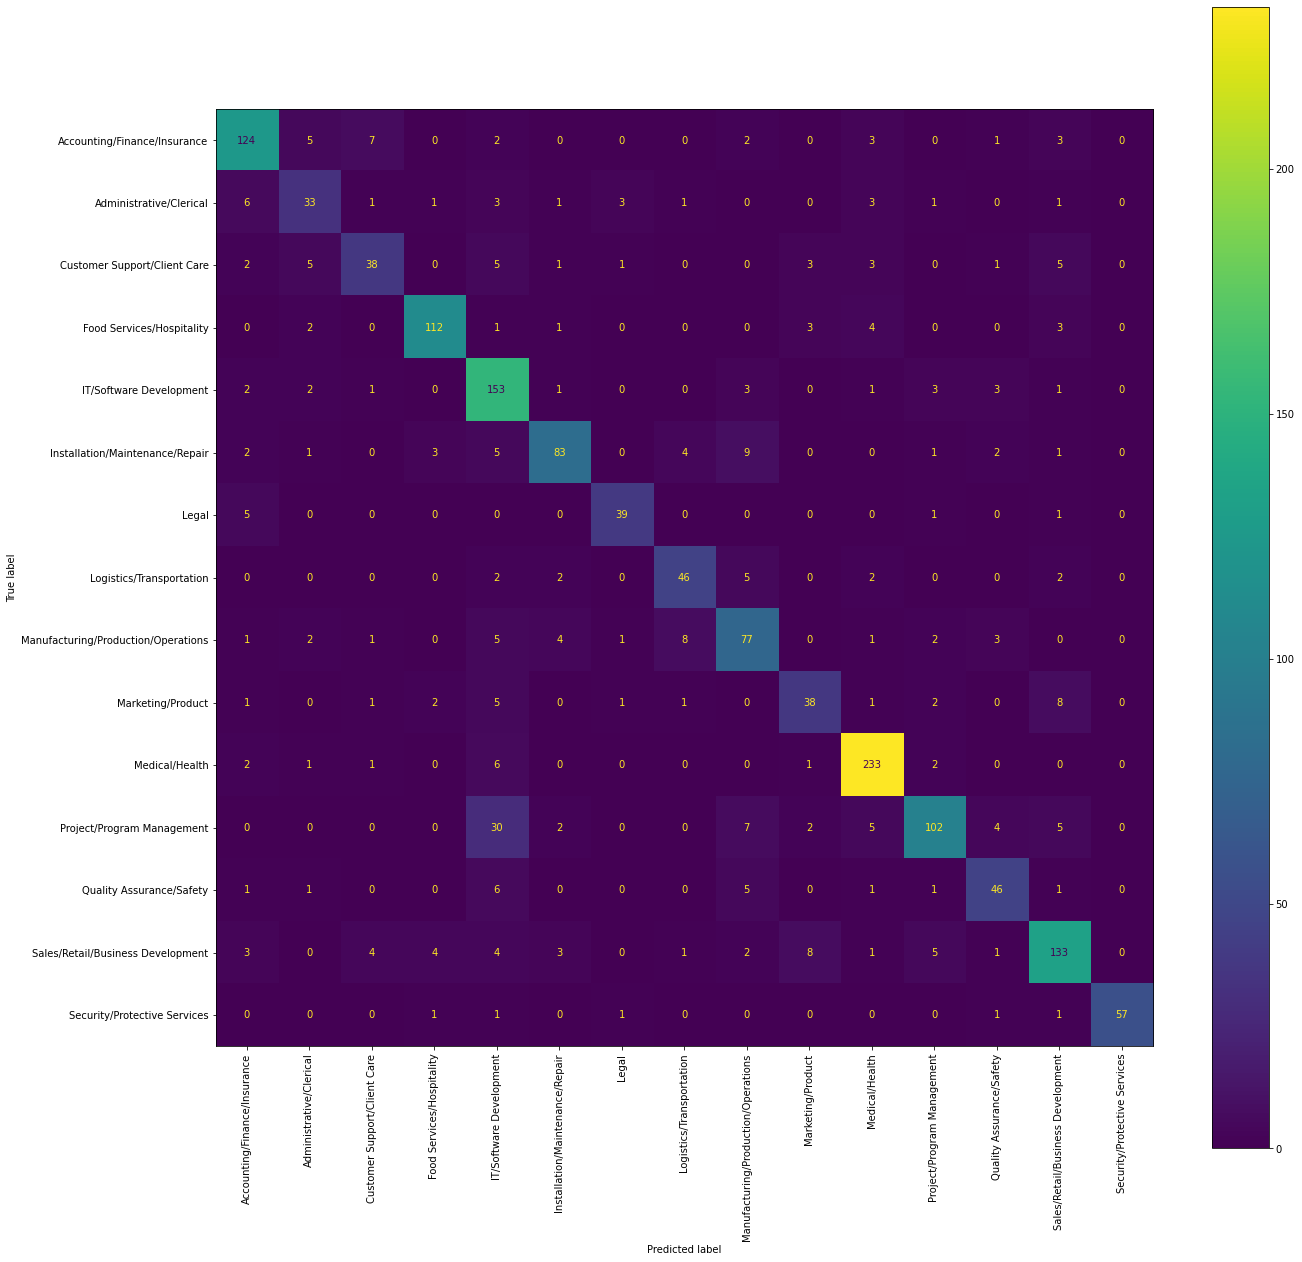

In [29]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [30]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

                                     precision    recall  f1-score   support

       Accounting/Finance/Insurance       0.83      0.84      0.84       147
            Administrative/Clerical       0.63      0.61      0.62        54
       Customer Support/Client Care       0.70      0.59      0.64        64
          Food Services/Hospitality       0.91      0.89      0.90       126
            IT/Software Development       0.67      0.90      0.77       170
    Installation/Maintenance/Repair       0.85      0.75      0.79       111
                              Legal       0.85      0.85      0.85        46
           Logistics/Transportation       0.75      0.78      0.77        59
Manufacturing/Production/Operations       0.70      0.73      0.72       105
                  Marketing/Product       0.69      0.63      0.66        60
                     Medical/Health       0.90      0.95      0.92       246
         Project/Program Management       0.85      0.65      0.74       15

In [31]:
my_sentence = "i have experience in healthcare, i did my medicare degree."


your_text = text_pipeline(my_sentence)

X = vectorizer.transform([your_text])

 
prediction = model.predict(X)

print(prediction)

['Medical/Health']


In [32]:
my_sentence = "i like math and I can do plumbing, i also like to teach and garden"

# Apply the text pipeline to your sentence
your_text = text_pipeline(my_sentence)

# Transform your cleaned text using the `vectorizer`
X = vectorizer.transform([your_text])

#predicting probabilities
predictions_proba = model.predict_proba(X)

# Get the classes and their respective probabilities
classes = model.classes_
proba = predictions_proba[0]

# Combine classes and probabilities and sort by probabilities
combined = list(zip(classes, proba))
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)

# Print the top three predictions and their probabilities as percentages
top_predictions = sorted_combined[:3]
for i, (predicted_class, probability) in enumerate(top_predictions, start=1):
    probability_percentage = probability * 100
    print(f"Prediction {i}: Career path '{predicted_class}' with success rate {probability_percentage:.2f} %")


Prediction 1: Career path 'Logistics/Transportation' with success rate 22.63 %
Prediction 2: Career path 'Marketing/Product' with success rate 20.09 %
Prediction 3: Career path 'Medical/Health' with success rate 15.38 %


In [33]:
my_sentence = "Passionate about all things tech, especially when it comes to Python. I thrive on crafting algorithms, diving into data science, and exploring the potential of fintech. Web development, AI, and machine learning? They're right up my alley. Committed to continuous learning and always excited about the next innovation on the horizon. Let's connect and explore the future of technology together. :)"

# Apply the text pipeline to your sentence
your_text = text_pipeline(my_sentence)

# Transform your cleaned text using the `vectorizer`
X = vectorizer.transform([your_text])

#predicting probabilities
predictions_proba = model.predict_proba(X)

# Get the classes and their respective probabilities
classes = model.classes_
proba = predictions_proba[0]

# Combine classes and probabilities and sort by probabilities
combined = list(zip(classes, proba))
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)

# Print the top three predictions and their probabilities as percentages
top_predictions = sorted_combined[:3]
for i, (predicted_class, probability) in enumerate(top_predictions, start=1):
    probability_percentage = probability * 100
    print(f"Prediction {i}: Career path '{predicted_class}' with success rate {probability_percentage:.2f} %")


Prediction 1: Career path 'IT/Software Development' with success rate 93.34 %
Prediction 2: Career path 'Accounting/Finance/Insurance' with success rate 3.54 %
Prediction 3: Career path 'Sales/Retail/Business Development' with success rate 1.24 %


In [34]:
model

MultinomialNB(alpha=1e-05)

In [35]:
df = pd.read_csv('cleaned_monster.csv')

In [36]:
df.head()

,job_description,job_title,job_type,location,sector
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",IT/Software Development
1,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Experienced (Non-Manager)
2,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Project/Program Management
3,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Experienced (Non-Manager)
4,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",Experienced (Non-Manager)
